[IPython Notebook](RV.ipynb) |  [Python Script](RV.py)

'rv' Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSets which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach both these ParameterSets for us.

In [3]:
ps, constraints = phoebe.dataset.rv()
print ps

ParameterSet: 3 parameters
                  times@_default: [] d
                    rvs@_default: [] km / s
                 sigmas@_default: [] km / s


In [4]:
ps_dep = phoebe.dataset.rv_dep()
print ps_dep

ParameterSet: 4 parameters
                ld_func@_default: interp
              ld_coeffs@_default: [ 0.5  0.5]
                        passband: Johnson:V
                intens_weighting: energy


For information on these passband-dependent parameters, see the section on the [lc dataset](LC) (these are used only to compute fluxes when rv_method=='flux-weighted')

### times

In [5]:
print ps['times']

Parameter: times@_default
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### rvs

In [6]:
print ps['rvs']

Parameter: rvs@_default
                       Qualifier: rvs
                     Description: Observed radial velocity
                           Value: [] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [7]:
print ps['sigmas']

Parameter: sigmas@_default
                       Qualifier: sigmas
                     Description: Observed uncertainty on rv
                           Value: [] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to the RV dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [orb dataset](ORB)
* parameters related to meshing, eclipse detection, and subdivision (used if rv_method=='flux-weighted') are explained in the section on the [mesh dataset](MESH)
* parameters related to computing fluxes (used if rv_method=='flux-weighted') are explained in the section on the [lc dataset](LC)

In [8]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

ParameterSet: 20 parameters
                enabled@_default: True
                 dynamics_method: keplerian
                            ltte: False
                    irrad_method: wilson
                 boosting_method: none
                       protomesh: False
                          pbmesh: False
                         horizon: False
            mesh_method@_default: marching
                  delta@_default: 0.1
              maxpoints@_default: 100000
      distortion_method@_default: roche
                  eclipse_method: native
                  horizon_method: boolean
                    atm@_default: ck2004
              lc_method@_default: numerical
             fti_method@_default: None
  fti_oversample@_default@_de...: 5
     rv_method@_default@_default: flux-weighted
       rv_grav@_default@_default: False


### rv_method

In [9]:
print ps_compute['rv_method']

Parameter: rv_method@_default@_default
                       Qualifier: rv_method
                     Description: Method to use for computing RVs (must be flux-weighted for Rossiter-McLaughlin)
                           Value: flux-weighted
                         Choices: flux-weighted, dynamical



If rv_method is set to 'dynamical' then the computed radial velocities are simply the z-velocities of the centers of mass of each component.  In this case, only the dynamical options are relevant.  For more details on these, see the section on the [orb dataset](ORB).

If rv_method is set to 'flux-weighted' then radial velocities are determined by the z-velocity of each visible surface element of the mesh, weighted by their respective intensities.  Since the stars are placed in their orbits by the dynamic options, the section on the [orb dataset](ORB) is still applicable.  So are the meshing options described in [mesh dataset](MESH) and the options for computing fluxes in [lc dataset](LC).

### rv_grav

In [10]:
print ps_compute['rv_grav']

Parameter: rv_grav@_default@_default
                       Qualifier: rv_grav
                     Description: Whether gravitational redshift effects are enabled for RVs
                           Value: False
                 Only visible if: rv_method:flux-weighted



See the [Gravitational Redshift Example Script](../examples/grav_redshift) for more details on the influence this parameter has on radial velocities.

Synthetics
------------------

In [11]:
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [12]:
b.run_compute(irrad_method='none')

<ParameterSet: 4 parameters | components: primary, secondary>

In [13]:
b['rv@model'].twigs

['times@primary@rv01@phoebe01@latest@rv@model',
 'rvs@primary@rv01@phoebe01@latest@rv@model',
 'times@secondary@rv01@phoebe01@latest@rv@model',
 'rvs@secondary@rv01@phoebe01@latest@rv@model']

In [14]:
print b['times@primary@rv@model']

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Observed times
                           Value: [ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [15]:
print b['rvs@primary@rv@model']

Parameter: rvs@primary@latest@model
                       Qualifier: rvs
                     Description: Observed radial velocity
                           Value: [  7.81828821e-01  -4.04738812e+01  -4.04849631e+01  -4.10610196e+01
  -4.24430228e+01  -4.50169449e+01  -4.96437762e+01  -5.71858784e+01
  -6.46956470e+01  -7.19480499e+01  -7.89150530e+01  -8.55678483e+01
  -9.18807826e+01  -9.78296423e+01  -1.03390606e+02  -1.08540733e+02
  -1.13263841e+02  -1.17538621e+02  -1.21348565e+02  -1.24679528e+02
  -1.27519606e+02  -1.29856974e+02  -1.31682104e+02  -1.32989036e+02
  -1.33773185e+02  -1.34032505e+02  -1.33759807e+02  -1.32963575e+02
  -1.31643922e+02  -1.29804647e+02  -1.27455730e+02  -1.24604702e+02
  -1.21262259e+02  -1.17442813e+02  -1.13160128e+02  -1.08429947e+02
  -1.03269411e+02  -9.77064215e+01  -9.17544731e+01  -8.54419902e+01
  -7.87919740e+01  -7.18280430e+01  -6.45831959e+01  -5.70792317e+01
  -4.93497355e+01  -4.14285498e+01  -3.33404998e+01  -2.51200552e+01
  -1.

Plotting
---------------

By default, RV datasets plot as 'rvs' vs 'times'.

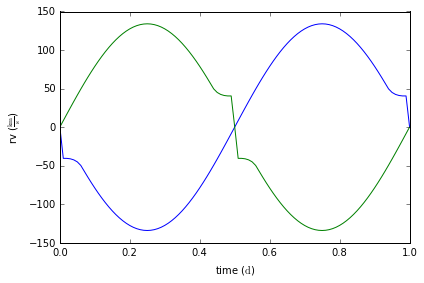

In [16]:
axs, artists = b['rv@model'].plot()

Since these are the only two columns available in the synthetic model, the only other options is to plot in phase instead of time.

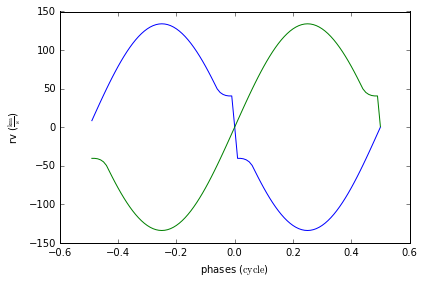

In [17]:
axs, artists = b['rv@model'].plot(x='phases')

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [18]:
b['period'].components

['binary', 'primary', 'secondary']

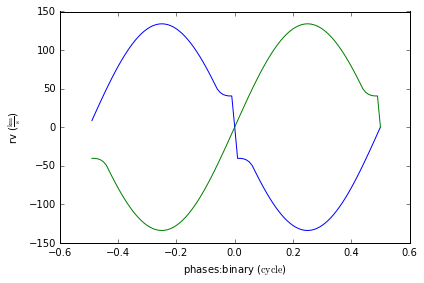

In [19]:
axs, artists = b['rv@model'].plot(x='phases:binary')

Mesh Fields
---------------------

If a mesh dataset exists at any of the same times as the time array in the rv dataset, *or* if pbmesh is set to True in the compute options, then radial velocities for each surface element will be available in the model as well (only if mesh_method=='flux_weighted').

Since the radial velocities are flux-weighted, the flux-related quantities are also included.  For a description of these, see the section on the [lc dataset](LC).

Let's add a single mesh at the first time of the rv dataset and re-call run_compute

In [20]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [21]:
b.run_compute(irrad_method='none')

<ParameterSet: 80 parameters | kinds: rv, mesh>

In [22]:
print b['model'].datasets

['mesh01', 'rv01']


These new columns are stored with the rv's dataset tag, but with the mesh model-kind.

In [23]:
b.filter(dataset='rv01', kind='mesh', context='model').twigs

['0.0@pblum@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@normal_intensities@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@abs_intensities@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@abs_normal_intensities@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@rvs@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@intensities@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@boost_factors@primary@rv01@phoebe01@latest@mesh@model',
 '0.0@pblum@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@normal_intensities@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@abs_intensities@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@abs_normal_intensities@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@rvs@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@intensities@secondary@rv01@phoebe01@latest@mesh@model',
 '0.0@boost_factors@secondary@rv01@phoebe01@latest@mesh@model']

Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [MESH dataset](MESH)), but since the mesh elements are stored with the 'mesh01' dataset tag, and the rv (including flux-related) quantities are stored with the 'rv01' dataset tag, it is important not to provide the 'mesh01' dataset tag before plotting.

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:257: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:257: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:


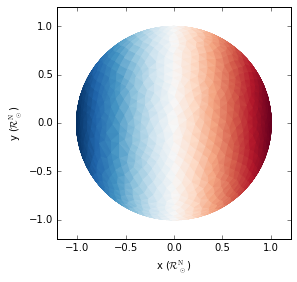

In [24]:
axs, artists = b['mesh@model'].plot(facecolor='rvs', edgecolor=None)
# NOT:
# axs, artists = b['mesh01@model'].plot(facecolor='rv', edgecolor=None)

### rvs

In [25]:
print b['rvs@primary@rv01@mesh@model']

Parameter: 0.0@rvs@primary@latest@model
                       Qualifier: rvs
                     Description: Per-element value for rv01 dataset
                           Value: [ -3.12888785e-01  -1.11682473e-07   3.12889504e-01 ...,   3.70200258e+00
   3.32945666e+00   3.09544836e+00] solRad / d
                  Constrained by: 
                      Constrains: None
                      Related to: None

